<a href="https://colab.research.google.com/github/juunnn/DTSAI2019/blob/master/D19_JunaediFahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

---



# Single Layer Neural Network (Perceptron)

## Definisikan kelas Perceptron

In [0]:
import numpy as np

class Perceptron(object):
  
  def __init__(self, no_input, threshold=100,learning_rate = 0.01):
    self.threshold = threshold
    self.learning_rate = learning_rate
    self.weights = np.zeros(no_input +1)
    
  def predict(self, inputs):
    summ = np.dot(self.weights[1:], inputs) + self.weights[0]
    return 1 if summ > 0 else 0
  
  def train(self, training_inputs, labels):
    for _ in range(self.threshold):
      for inputs,label in zip(training_inputs, labels):
        prediction = self.predict(inputs)
        self.weights[1:] += self.learning_rate*(label - prediction)*inputs
        self.weights[0] += self.learning_rate*(label - prediction)

## Training AND GATE

In [0]:
training_inputs = []
training_inputs.append(np.array([1,1]))
training_inputs.append(np.array([1,0]))
training_inputs.append(np.array([0,1]))
training_inputs.append(np.array([0,0]))

labels = np.array([1,0,0,0])

and_perceptron = Perceptron(2, threshold=200, learning_rate=0.1)
and_perceptron.train(training_inputs, labels)

inputs = np.array([1,1])
print(and_perceptron.predict(inputs))


inputs = np.array([0,1])
print(and_perceptron.predict(inputs))

1
0



## Training OR GATE

In [0]:
training_inputs = []
training_inputs.append(np.array([1,1]))
training_inputs.append(np.array([1,0]))
training_inputs.append(np.array([0,1]))
training_inputs.append(np.array([0,0]))

labels = np.array([1,1,1,0])

or_perceptron = Perceptron(2, threshold=200, learning_rate=0.1)
or_perceptron.train(training_inputs, labels)

inputs = np.array([1,1])
print(or_perceptron.predict(inputs))


inputs = np.array([0,0])
print(or_perceptron.predict(inputs))

1
0


In [0]:
training_inputs = []
training_inputs.append(np.array([1]))
training_inputs.append(np.array([1]))
training_inputs.append(np.array([0]))
training_inputs.append(np.array([0]))

labels = np.array([0,0,1,1])

not_perceptron = Perceptron(1, threshold=200, learning_rate=0.1)
not_perceptron.train(training_inputs, labels)

inputs = np.array([1])
print(not_perceptron.predict(inputs))


inputs = np.array([0])
print(not_perceptron.predict(inputs))

0
1


## Training XOR GATE

In [0]:
def xor(inputs):
  gate1 = not_perceptron.predict(and_perceptron.predict(inputs))
  gate2 = or_perceptron.predict(inputs)
  return and_perceptron.predict([gate1, gate2])

training_inputs = []
training_inputs.append(np.array([1,1]))
training_inputs.append(np.array([1,0]))
training_inputs.append(np.array([0,1]))
training_inputs.append(np.array([0,0]))

for train in training_inputs:
  print(xor(train))

0
1
1
0


# Multi Layer Perceptron

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib

In [0]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

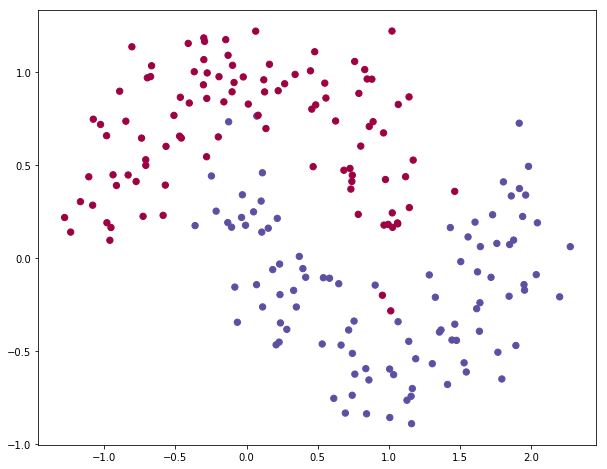

In [0]:
np.random.seed(3)
X, y = sklearn.datasets.make_moons(200, noise=.2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [0]:
def plot_decs_bound(pred_func):
  # Set min and max values and give it some padding 
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
  h = 0.01 
  # Generate a grid of points with distance h between them 
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
  # Predict the function value for the whole gid 
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape) 
  # Plot the contour and training examples 
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 

In [0]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

In [0]:
def calculate_loss(model):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
  
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  
  corect_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(corect_logprobs)
  
  data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2) ))
  return 1./num_examples * data_loss

In [0]:
def predict(model, x):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
  
  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  
  return np.argmax(probs, axis = 1)

In [0]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
  np.random.seed(0)
  W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))
  
  model = {}
  for i in range(0, num_passes): 
    # Forward propagation 
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Backpropagation 
    delta3 = probs 
    delta3[range(num_examples), y] -= 1 
    dW2 = (a1.T).dot(delta3) 
    db2 = np.sum(delta3, axis=0, keepdims=True) 
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
    dW1 = np.dot(X.T, delta2) 
    db1 = np.sum(delta2, axis=0) 
    # Add regularization terms (b1 and b2 don't have regularization terms) 
    dW2 += reg_lambda * W2 
    dW1 += reg_lambda * W1 
    # Gradient descent parameter update 
    W1 += -epsilon * dW1 
    b1 += -epsilon * db1 
    W2 += -epsilon * dW2 
    b2 += -epsilon * db2 
    # Assign new parameters to the model 
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2} 
    # Optionally print the loss. 
    # This is expensive because it uses the whole dataset, so we don't want to do it too often. 
    if print_loss and i % 1000 == 0: 
      print("Loss after iteration %i: %f" %(i, calculate_loss(model))) 
      
    return model 

Loss after iteration 0: 0.418627


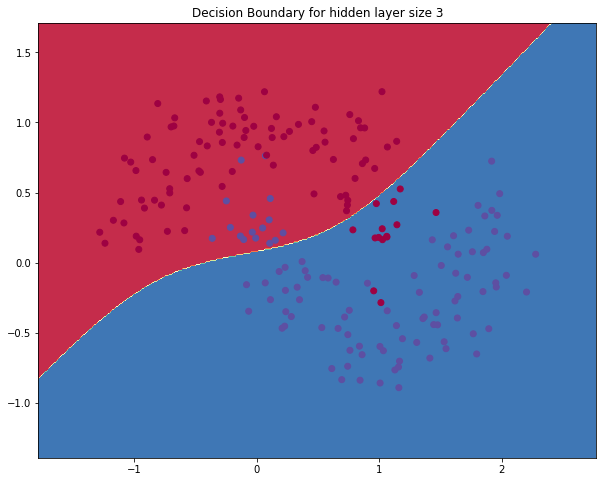

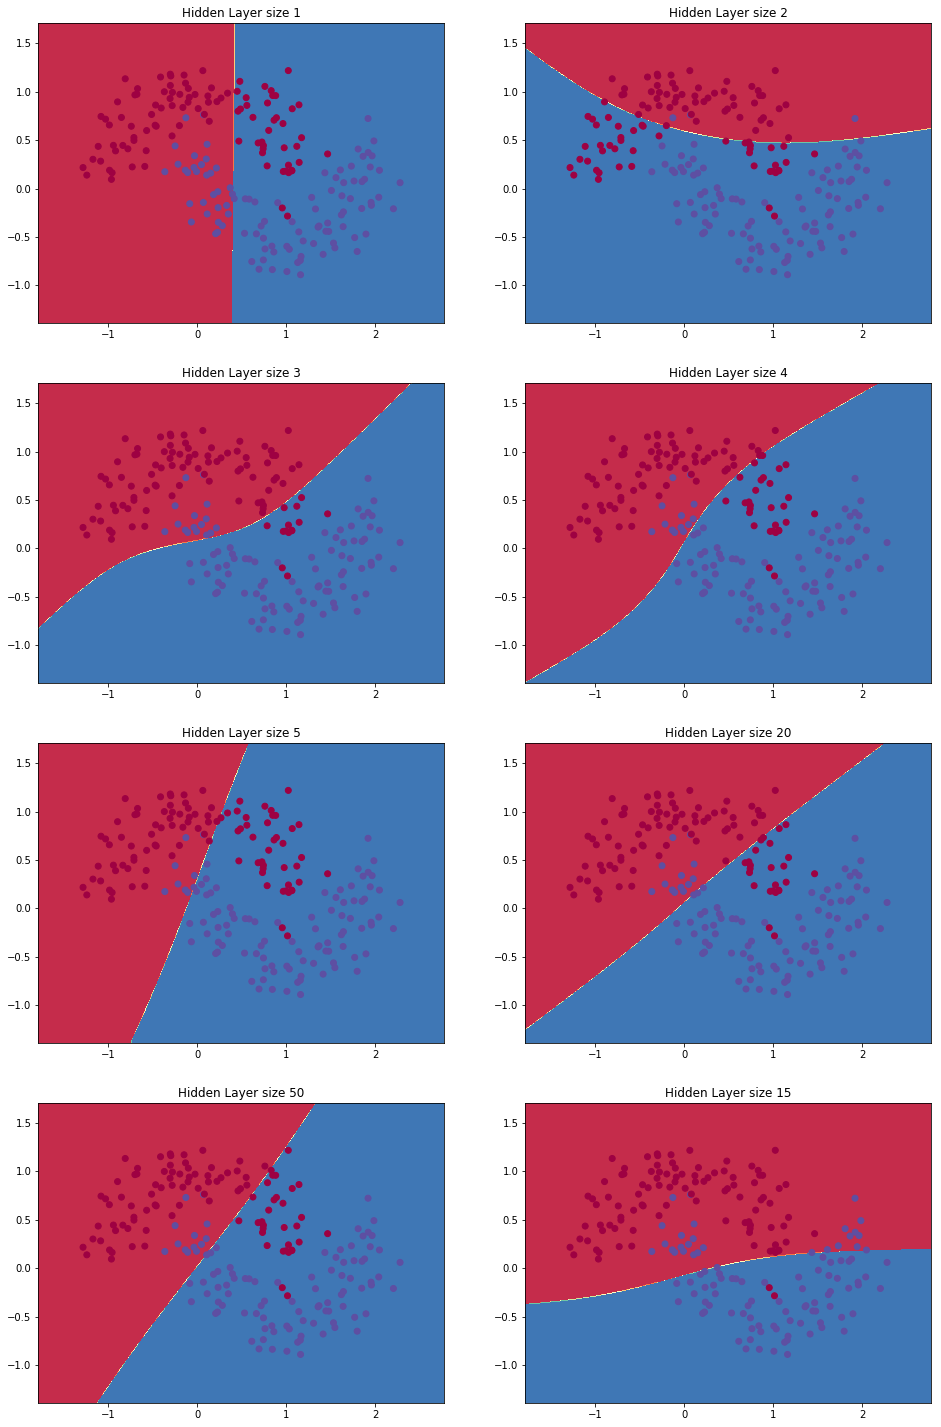

In [0]:
# Build a model with a 3-dimensional hidden layer 
model = build_model(3, print_loss=True) 
 
# Plot the decision boundary 
plot_decs_bound(lambda X: predict(model, X)) 
plt.title("Decision Boundary for hidden layer size 3") 
 
# %% 14 
plt.figure(figsize=(16, 32)) 
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50, 15] 
for i, nn_hdim in enumerate(hidden_layer_dimensions): 
    plt.subplot(5, 2, i+1) 
    plt.title('Hidden Layer size %d' % nn_hdim) 
    model = build_model(nn_hdim) 
    plot_decs_bound(lambda x: predict(model, x)) 
plt.show()

## Perceptron

In [0]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y


def visualize(X, y, clf):
    plot_decision_boundary(lambda x: clf.predict(x), X, y)
   


def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title("Logistic Regression")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


def classify(X, y):
    clf = linear_model.Perceptron()
    clf.fit(X, y)
    return clf

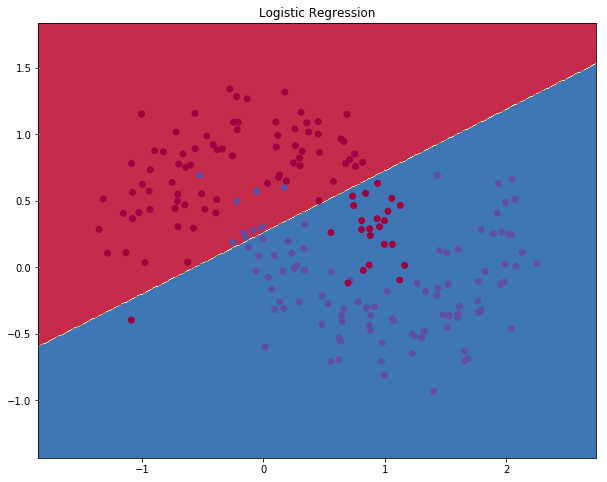

In [0]:
X, y = generate_data()
clf = classify(X, y)
visualize(X, y, clf)